In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

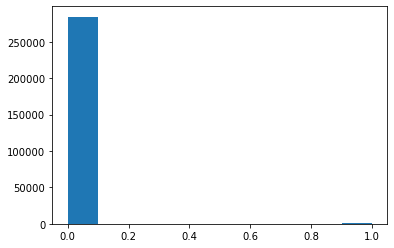

In [6]:
plt.hist(df['Class'])

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

# Model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
X = df.drop(columns = ['Class','Time'])
y = df['Class']

In [11]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [12]:
clf = LogisticRegression()

In [13]:
clf.fit(X_train, y_train)

C:\Users\enoch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print('Accuracy: {}, Precision :  {}, Recall: {}'.
      format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred)))

Accuracy: 0.9992232968389245, Precision :  0.8584905660377359, Recall: 0.610738255033557


In [16]:
y_test.shape, y_pred.shape

((93987,), (93987,))

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred)

In [18]:
confusion_matrix

col_0,0,1
Class,,
0,93823,15
1,58,91


<AxesSubplot:xlabel='col_0', ylabel='Class'>

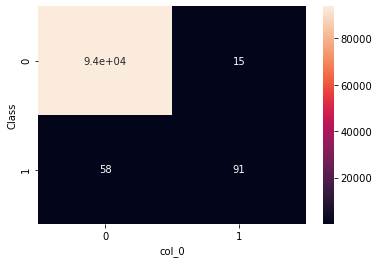

In [19]:
sns.heatmap(confusion_matrix,annot=True)

# Balancing data

Undersampling

In [20]:
from imblearn.under_sampling import NearMiss

In [21]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)

In [22]:
X_res.shape,y_res.shape

((984, 29), (984,))

In [23]:
y_res.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
X_train_res,X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.3, random_state =42)

In [25]:
clf_res = LogisticRegression()

In [26]:
clf_res.fit(X_train_res, y_train_res)

LogisticRegression()

In [27]:
y_pred_res = clf_res.predict(X_test_res)

In [28]:
print('Accuracy: {}, Precision :  {}, Recall: {}'.
      format(accuracy_score(y_test_res, y_pred_res), precision_score(y_test_res, y_pred_res),recall_score(y_test_res, y_pred_res)))

Accuracy: 0.9898648648648649, Precision :  1.0, Recall: 0.9794520547945206


In [29]:
confusion_matrix = pd.crosstab(y_test_res, y_pred_res)

<AxesSubplot:xlabel='col_0', ylabel='Class'>

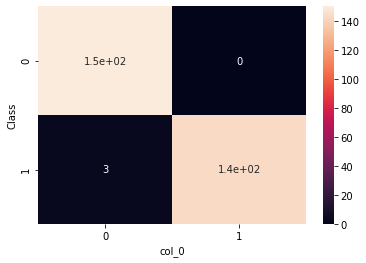

In [30]:
sns.heatmap(confusion_matrix, annot= True)

Oversampling

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# Synthetic Minority Over-Sampling Technique
smk = SMOTE(random_state = 42)

In [33]:
X_res, y_res = smk.fit_resample(X,y)

In [34]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res, test_size = 0.2, random_state = 42)

In [35]:
X_res.shape, y_res.shape

((568630, 29), (568630,))

In [36]:
X_train_res.shape, y_train_res.shape

((454904, 29), (454904,))

In [37]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [38]:
clf_res = LogisticRegression()

In [39]:
clf_res.fit(X_train_res, y_train_res)

C:\Users\enoch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred_res = clf_res.predict(X_test_res)

In [41]:
print('Accuracy: {}, Precision :  {}, Recall: {}'.
      format(accuracy_score(y_test_res, y_pred_res), precision_score(y_test_res, y_pred_res),recall_score(y_test_res, y_pred_res)))

Accuracy: 0.9589188048467369, Precision :  0.981673849780823, Recall: 0.935464055040719


<AxesSubplot:xlabel='col_0', ylabel='Class'>

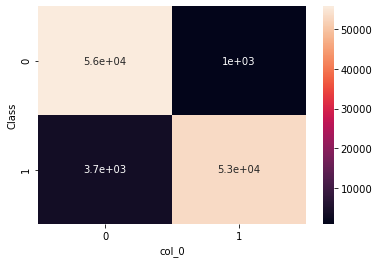

In [42]:
confusion_matrix = pd.crosstab(y_test_res, y_pred_res)
sns.heatmap(confusion_matrix, annot = True)

In [43]:
confusion_matrix

col_0,0,1
Class,,
0,55755,995
1,3677,53299


# XGBoost Model

In [44]:
from xgboost import XGBClassifier

In [45]:
xgb = XGBClassifier(n_estimators = 50)

In [46]:
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
y_pred_res = xgb.predict(X_test_res)

In [48]:
y_train_pred_res = xgb.predict(X_train_res)

In [49]:
print('Accuracy: {}, Precision :  {}, Recall: {}'.
      format(accuracy_score(y_train_res, y_train_pred_res), precision_score(y_train_res, y_train_pred_res),recall_score(y_train_res, y_train_pred_res)))

Accuracy: 0.9997450011430983, Precision :  0.9994987931466558, Recall: 0.9999912025653319


In [50]:
print('Accuracy: {}, Precision :  {}, Recall: {}'.
      format(accuracy_score(y_test_res, y_pred_res), precision_score(y_test_res, y_pred_res),recall_score(y_test_res, y_pred_res)))

Accuracy: 0.9995075884142588, Precision :  0.999035595300719, Recall: 0.999982448750351


<AxesSubplot:xlabel='col_0', ylabel='Class'>

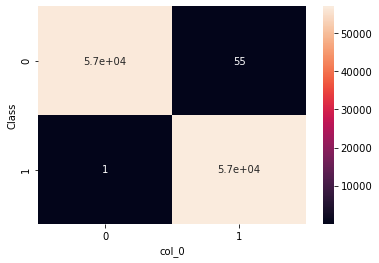

In [51]:
confusion_matrix = pd.crosstab(y_test_res, y_pred_res)
sns.heatmap(confusion_matrix, annot = True)

In [52]:
confusion_matrix

col_0,0,1
Class,,
0,56695,55
1,1,56975


# Hyper Parameter Tuning


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'learning_rate' : [0.001,0.01,0.1,0.25,0.5,0.4],
         'max_depth' : [1,2,3,4,5,6],
         'max_features' : [1,2,3,4,5,6],
         'n_estimators' : [20,30,40,50,70,100]}

In [55]:
grid_search = GridSearchCV(xgb, param_grid = params,cv=5,n_jobs=-1, verbose=0)

In [56]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [58]:
X_train.shape, y_train.shape

((190820, 29), (190820,))

In [62]:
model = DBSCAN()

In [64]:
model.fit(X_test)

DBSCAN()

In [65]:
print(model)

DBSCAN()


In [75]:
X_test.shape

(93987, 29)

In [74]:
len(model.labels_)

93987

In [67]:
Counter(model.labels_)

Counter({-1: 87748,
         0: 31,
         1: 10,
         2: 20,
         3: 28,
         4: 7,
         5: 77,
         298: 6,
         6: 230,
         7: 27,
         30: 21,
         8: 15,
         304: 5,
         9: 7,
         10: 11,
         248: 10,
         11: 32,
         12: 5,
         13: 30,
         14: 175,
         28: 75,
         15: 7,
         16: 59,
         17: 20,
         18: 21,
         19: 110,
         20: 30,
         69: 7,
         21: 382,
         22: 59,
         23: 125,
         24: 9,
         25: 7,
         26: 20,
         27: 6,
         29: 214,
         31: 8,
         73: 6,
         32: 59,
         33: 27,
         326: 14,
         34: 40,
         35: 5,
         36: 7,
         37: 140,
         38: 9,
         267: 9,
         39: 11,
         40: 12,
         41: 5,
         42: 100,
         43: 27,
         44: 23,
         45: 11,
         46: 48,
         381: 5,
         47: 116,
         48: 13,
         49: 5,
        

In [83]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
211399    0
245040    0
97433     0
94007     0
176304    0
Name: Class, Length: 93987, dtype: int64

In [78]:
model.labels_.map(1 if model.labels==-1 else 0)

AttributeError: 'numpy.ndarray' object has no attribute 'map'